# Lab 6: Electron charge/mass

## Diego McHenry and Julia Gelfond

### March 11, 2024

Introduction: In this lab we will use a constant magnetic field to find an electrons charge to mass ratio.

Setup: We use the apparatus shown. It accelerates electrons down using a measured potential difference. The coils carry a current which provides a constant magnetic field insdie the vacuum tube. The current and voltage are measured using DMMs. The aparatus features a built-in measurement device which we used to make our distance measurements.

(the current in the drawing is written to represent the drift of electons)




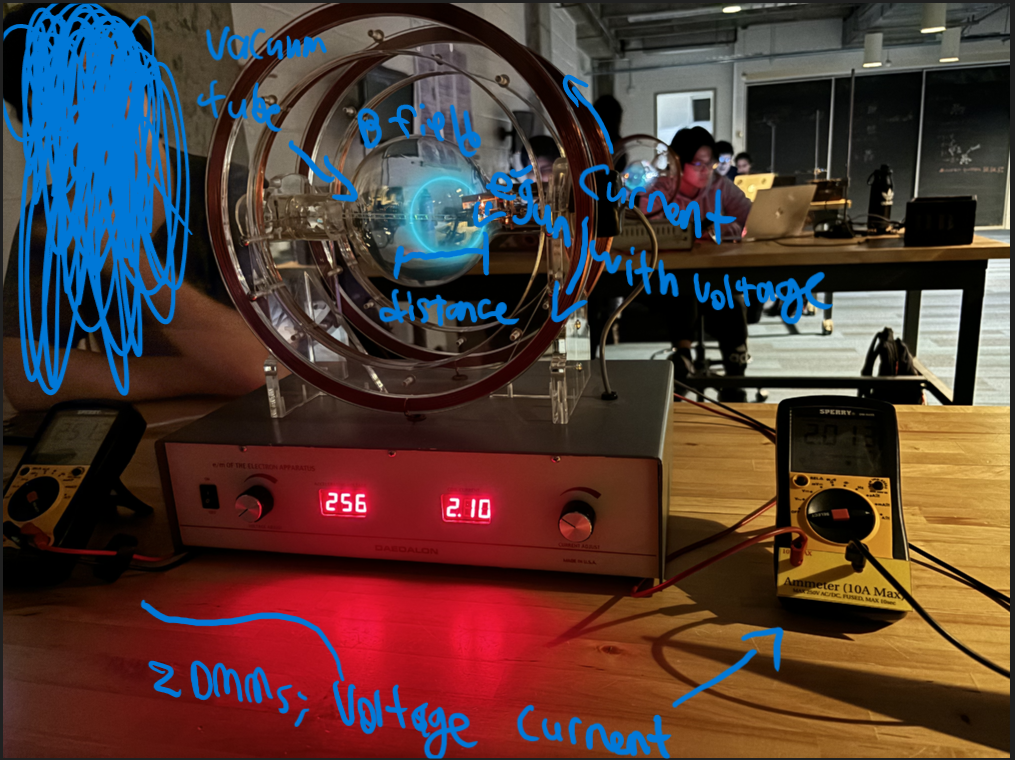

Data Collection consists of choosing 2 currents and then varying the voltage for each and measuring the resulting distance.

In [1]:
#potentially useful modules
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import math

import numpy as np

import scipy.optimize as opt

Data is imported to the notebook and unit/error adjustments are calculated as necessary.

In [2]:
data1 = pd.read_excel("Lab6dat.xlsx")
data1['Distance (m)']=data1['Distance (cm)']/100
data1['dDistance (m)']=data1['dDistance (cm)']/100
data1['Distance sq (m)']=data1['Distance (m)']**2
data1['dDistance sq (m)']=(2*((data1['dDistance (m)'])/data1['Distance (m)']))*data1['Distance sq (m)']

The radii of the coils are 15+-.5cm, and the current error is 2%+3 dgt, so .03A.

.

With the data aquired, we build a model. Graphing the Voltage vs the Distance in meters squared is the first step to finding the desired values. Once we have the slope, we can manipulate it to find our ratio.

In [3]:
def linmodel(x, A, B):
    y =  A*x+B
    return y

fit_param, fit_param_errors = opt.curve_fit( linmodel, data1['Distance sq (m)'],
                            data1['Voltage (V)'],
                            sigma=data1['dVoltage (V)'],
                            absolute_sigma=True )
# The value of A, the uncertainty in A
fitA = fit_param[0]
fitdA = np.sqrt(fit_param_errors[0,0])   

# The value of B, the uncertainty in B
fitB = fit_param[1]
fitdB = np.sqrt(fit_param_errors[1,1])  

In [4]:
#adjust for xerr
data1['yerrto'] = np.sqrt((fitA * data1['dDistance sq (m)'])**2 + (data1['dVoltage (V)'])**2)

In [5]:
def linmodel(x, A, B):
    y =  A*x+B
    return y

fit_param, fit_param_errors = opt.curve_fit( linmodel, data1['Distance sq (m)'],
                            data1['Voltage (V)'],
                            sigma=data1['yerrto'],
                            absolute_sigma=True )
# The value of A, the uncertainty in A
fitA = fit_param[0]
fitdA = np.sqrt(fit_param_errors[0,0])   

# The value of B, the uncertainty in B
fitB = fit_param[1]
fitdB = np.sqrt(fit_param_errors[1,1])    

#here are our values

print(f'{fitA:.0f}, +- {fitdA:.0f} V/m^2')
print(f'{fitB:.0f}, +- {fitdB:.0f} V/m^2')
slope1=fitA
dslope1=fitdA

20377, +- 974 V/m^2
20, +- 7 V/m^2


Text(0.5, 1.0, 'Diameter-Voltage relationship of electron circle at 1.184')

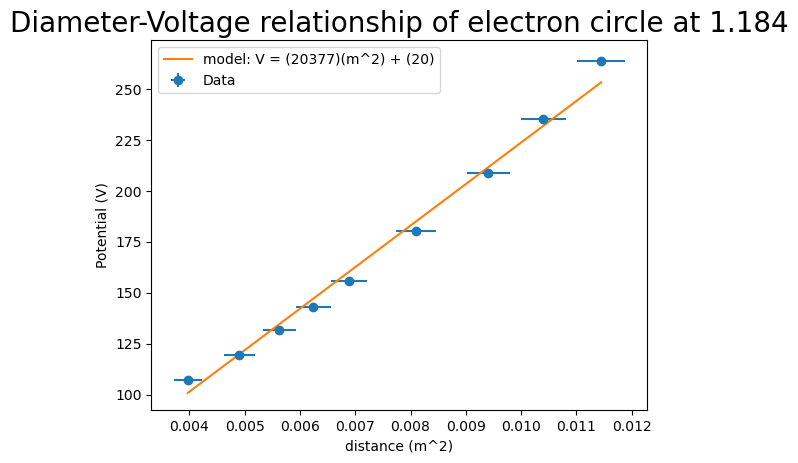

In [6]:
plt.errorbar(data1['Distance sq (m)'], data1['Voltage (V)'], yerr=data1['dVoltage (V)'], 
             xerr=data1['dDistance sq (m)'], fmt="o", label='Data')

plt.plot(data1['Distance sq (m)'], linmodel(data1['Distance sq (m)'], fitA, fitB), label='model: V = (20377)(m^2) + (20)')

plt.legend()
plt.xlabel('distance (m^2)')
plt.ylabel('Potential (V)')
plt.title(('Diameter-Voltage relationship of electron circle at 1.184'), fontsize = 20)

The ratio can be found with the following equation:

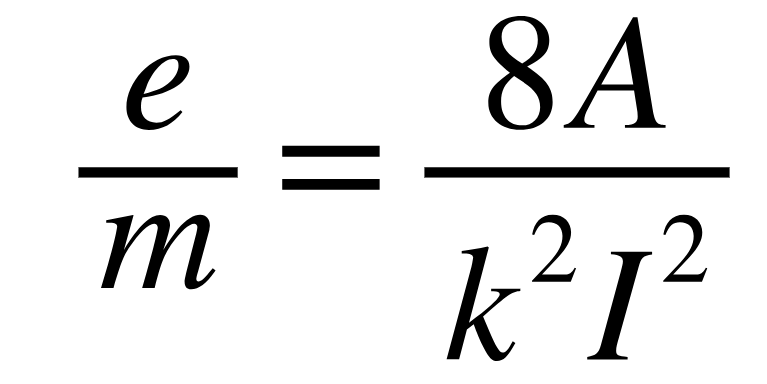

8 is a constant, A is the slope of the graph, k is a constant (with error), and I is the current.

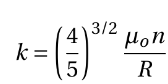

In [7]:
epm1 = (8*slope1)/(1.184**2 * ((4/5)**(3/2) * ((4*math.pi*131*10**-7) / .15))**2)
print(epm1, 'C/kg')

188567936961.36807 C/kg


In [8]:
data1 = pd.read_excel("Lab6dat2.xlsx")
data1['Distance (m)']=data1['Distance (cm)']/100
data1['dDistance (m)']=data1['dDistance (cm)']/100
data1['Distance sq (m)']=data1['Distance (m)']**2
data1['dDistance sq (m)']=(2*((data1['dDistance (m)'])/data1['Distance (m)']))*data1['Distance sq (m)']

The radii of the coils are 15+-.5cm, and the current error is 2%+3 dgt, so .04A.

In [9]:
def linmodel(x, A, B):
    y =  A*x+B
    return y

fit_param, fit_param_errors = opt.curve_fit( linmodel, data1['Distance sq (m)'],
                            data1['Voltage (V)'],
                            sigma=data1['dVoltage (V)'],
                            absolute_sigma=True )
# The value of A, the uncertainty in A
fitA = fit_param[0]
fitdA = np.sqrt(fit_param_errors[0,0])   

# The value of B, the uncertainty in B
fitB = fit_param[1]
fitdB = np.sqrt(fit_param_errors[1,1])  

In [10]:
#adjust for xerr
data1['yerrto'] = np.sqrt((fitA * data1['dDistance sq (m)'])**2 + (data1['dVoltage (V)'])**2)

In [11]:
def linmodel(x, A, B):
    y =  A*x+B
    return y

fit_param, fit_param_errors = opt.curve_fit( linmodel, data1['Distance sq (m)'],
                            data1['Voltage (V)'],
                            sigma=data1['yerrto'],
                            absolute_sigma=True )
# The value of A, the uncertainty in A
fitA = fit_param[0]
fitdA = np.sqrt(fit_param_errors[0,0])   

# The value of B, the uncertainty in B
fitB = fit_param[1]
fitdB = np.sqrt(fit_param_errors[1,1])    

#here are our values

print(f'{fitA:.0f}, +- {fitdA:.0f} V/m^2')
print(f'{fitB:.0f}, +- {fitdB:.0f} V/m^2')
slope2=fitA
dslope2=fitdA

59273, +- 1881 V/m^2
17, +- 9 V/m^2


Text(0.5, 1.0, 'Diameter-Voltage relationship of electron circle at 2.008A')

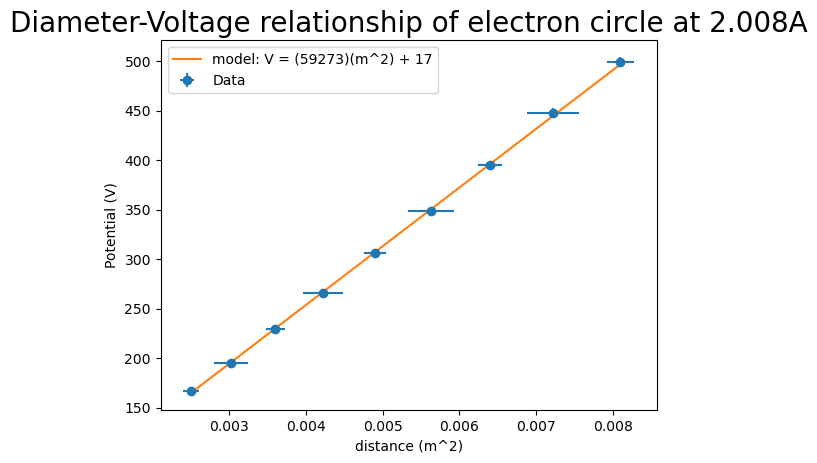

In [12]:
plt.errorbar(data1['Distance sq (m)'], data1['Voltage (V)'], yerr=data1['dVoltage (V)'], 
             xerr=data1['dDistance sq (m)'], fmt="o", label='Data')

plt.plot(data1['Distance sq (m)'], linmodel(data1['Distance sq (m)'], fitA, fitB), label='model: V = (59273)(m^2) + 17')

plt.legend()
plt.xlabel('distance (m^2)')
plt.ylabel('Potential (V)')
plt.title(('Diameter-Voltage relationship of electron circle at 2.008A'), fontsize = 20)

Once again, we calculate the ratio.

In [13]:
epm2 = (8*slope2)/(1.184**2 * ((4/5)**(3/2) * ((4*math.pi*131*10**-7) / .15))**2)
print(epm2, 'C/kg')

548523782105.7022 C/kg


Results and Error

Error propogation is handled for us in this lab with this given equation:

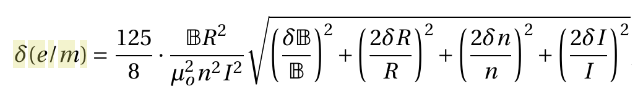

In [14]:
depm1 = ((125/8) * ((slope1*.15**2)/(4*(math.pi*10**-7)**2*131**2*1.184**2)) * math.sqrt((dslope1/slope1)**2 
        + ((2*.005)/.15)**2 + (2/(131))**2 + (.05/1.184)**2))
depm2 = ((125/8) * ((slope2*.15**2)/(4*(math.pi*10**-7)**2*131**2*2.008**2)) * math.sqrt((dslope2/slope2)**2 
        + ((2*.005)/.15)**2 + (2/(131))**2 + (.09/1.184)**2))
print(epm1, depm1)
print(epm2, depm2)

188567936961.36807 70545653294.52661
548523782105.7022 81672914975.16536


This leaves our results for the first trial as follows:

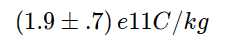

and the second trial:

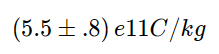


The accepted value is

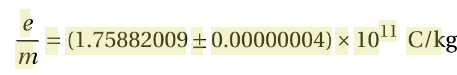

Performing a T-test we find:

In [15]:
t1 = (1.9-1.75882009)/(.7+.00000004)
t2 = (5.5-1.75882009)/(.8+.00000004)
print('t1:', t1)
print('t2:', t2)

t1: 0.20168557418939573
t2: 4.676474653676268


The t value for trial one is very low. This indicates a high degree of agreement between the literature value and the experimental value. This is, however, partially due to the relatively large error in the experimental numbers. The t value for trial 2 is much larger, mostly due to the experimental and literature values being quite different. The t2 quantity is not necessarily a bad number for this type of experiment. It is worth noting that the error is relatively smaller for the second experiemtnal value. Additionally, no source appears to be absolutely dominant. The distance measurements were the greatest contibutors. The distance measurement for electron circle was significant before being squared in the determination of the slope, propogating its influence further. The slope was the main source of error in the above equation, and most of that originated from the m values.

Significance

JJ Thomson was the first scientist to perform, document, and circulate a study with similar results. It also lead him to propose suggest the existence of particles significantly smaller than a hydrogen atom. Thus, the electron was discovered after. This was, needless to say, critically important. The lab now serves to demonstrate the forces acting on charged particles. In the prelab, numerous equations were introduced and manipulated to find an expression for the charge/mass ratio. The lab also demonstrates the crossed-nature of the force as electrons subject to a constant B field move in a circular path and don't accelerate in 1 direction.